<center> <img src="https://i.imgur.com/zRrFdsf.png" width="700"> </center>

<a target="_blank" href="https://colab.research.google.com/drive/1YIszZIfiSuouipZhBBLbqGz6p5fkf-bP#scrollTo=qEKZtjHDAeEV">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# PUBLICAR EN AIRBNB!

In [ ]:
myEstate="1711 E Olive Way, Seattle, WA 98102"

## El Problema


Se desea estimar cuánto cobrar por noche por un “Private room in rental unit” de 1 dormitorio, ubicado en 1711 E Olive Way, Seattle, WA, utilizando como único criterio los precios de unidades similares localizadas en un radio de 500 metros.

### Instalaciones

In [ ]:
!pip install pysal h3

### Los datos

Se trabajará con Seattle data.




In [ ]:
import pandas as pd
import geopandas as gpd


linkSeattleBorder="https://github.com/Lulo-Vilcarano-MF/Precio-AirBnb-en-Seattle/raw/refs/heads/main/2020_Census_Tracts_Seattle_8661193084158732132.zip"
seattle=gpd.read_file(linkSeattleBorder)

linkSeattleAIrbnb="https://github.com/Lulo-Vilcarano-MF/Precio-AirBnb-en-Seattle/raw/refs/heads/main/airbnb_seattle_clean.csv"
airbnb=pd.read_csv(linkSeattleAIrbnb, encoding='latin1', on_bad_lines='skip')

 **seattle** GDF


In [ ]:
seattle

,GEOID20,GROSS_ACRE,LAND_ACRES,WATER_ACRE,NAME,TRACT_NUMB,BASENAME,UVDA_AREA,CRA_NO,CRA_GRP,GEN_ALIAS,DETL_NAMES,C_DISTRICT,geometry
0,53033000402,444.493643,444.527261,0.000000,Census Tract 4.02,402,4.02,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((1267598.433 267477.138, 1267788.924 ..."
1,53033000403,180.930716,165.408389,15.535762,Census Tract 4.03,403,4.03,Bitter Lake Village,9.1,9,Broadview/Bitter Lake,"Broadview, Bitter Lake",5,"POLYGON ((1265848.993 271492.767, 1265842.812 ..."
2,53033000700,319.838996,319.862596,0.000000,Census Tract 7,700,7,Lake City,8.2,8,Olympic Hills/Victory Heights,"Lake City, Victory Heights, Olympic Hills, Pin...",5,"POLYGON ((1277629.018 265876.292, 1277833.975 ..."
3,53033003302,154.942826,154.952619,0.000000,Census Tract 33.02,3302,33.02,Ballard,10.2,10,Whittier Heights,"Whittier Heights, Loyal Heights, Crown Hill",6,"POLYGON ((1262877.612 251639.607, 1262891.039 ..."
4,53033003601,166.571397,166.583375,0.000000,Census Tract 36.01,3601,36.01,Green Lake - Roosevelt,9.4,9,Green Lake,"Green Lake, Meridian, Roosevelt, Woodland Park",6,"POLYGON ((1274839.167 250046.877, 1274833.189 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,53033008101,68.690415,66.798515,68.613998,Census Tract 81.01,8101,81.01,Center City,13.2,13,Downtown Commercial Core,"Downtown Commercial Core, West Edge, Central B...",7,"POLYGON ((1268688.847 226501.062, 1268841.791 ..."
173,53033010401,402.739919,402.750637,0.000000,Census Tract 104.01,10401,104.01,Othello,3.5,3,Beacon Hill,Beacon Hill,2,"POLYGON ((1279994.827 207985.661, 1280136.282 ..."
174,53033011401,304.713408,304.719237,0.000000,Census Tract 114.01,11401,114.01,Westwood-Highland Park,2.4,2,Roxhill/Westwood,"Roxhill, Westwood, South Delridge, White Center",1,"POLYGON ((1264535.644 198387.214, 1264519.606 ..."
175,53033011700,868.762098,868.775078,0.000000,Census Tract 117,11700,117,Rainier Beach,3.4,3,South Beacon Hill/NewHolly,"South Beacon Hill, NewHolly, Holly Park",2,"POLYGON ((1280795.738 197846.082, 1280877.933 ..."


Columnas de **airbnb_all** DF

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6862 non-null   int64  
 1   price          6227 non-null   float64
 2   bedrooms       6862 non-null   int64  
 3   property_type  6862 non-null   object 
 4   latitude       6862 non-null   float64
 5   longitude      6862 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 321.8+ KB


Nuestro dódigo está limpio, es decir, tiene las columnas necesarias para trabajar.

Mostramos la columna bedrooms para saber cuantos números de habitaciones tienen

In [ ]:
pd.crosstab(airbnb.property_type,airbnb.bedrooms)


bedrooms,1,2
property_type,,
Entire home/apt,0,5670
Hotel room,29,0
Private room,1146,0
Shared room,17,0


###Establecemos condiciones del problema

In [ ]:
conditionText="bedrooms==1 & property_type=='Private room'"
airbnb_source=airbnb.query(conditionText).copy()

# Drop rows with missing price values after filtering
airbnb_source.dropna(subset=['price'], inplace=True)

airbnb_source

,id,price,bedrooms,property_type,latitude,longitude
1,9419,88.0,1,Private room,47.550170,-122.319370
6,210316,72.0,1,Private room,47.700850,-122.367000
8,226536,70.0,1,Private room,47.661330,-122.400880
9,226677,91.0,1,Private room,47.549710,-122.317530
22,365550,128.0,1,Private room,47.600020,-122.327420
...,...,...,...,...,...,...
6836,1439427815916909233,197.0,1,Private room,47.670049,-122.416232
6854,1446831015876604584,111.0,1,Private room,47.712460,-122.334350
6859,1447515507388919514,79.0,1,Private room,47.652209,-122.339577
6860,1447543427090799824,79.0,1,Private room,47.653082,-122.341711


Ahora se convierte el  DF del airbnb en GDF:

In [ ]:
# Create a list of columns that must be identical to be considered a duplicate
key_columns = ['latitude', 'longitude']

# Remove rows that are identical across the key columns
airbnb_source_unique = airbnb_source.drop_duplicates(subset=key_columns)

En GDF:

In [ ]:
airbnb_source_gdf = gpd.GeoDataFrame(
    airbnb_source_unique,
    geometry=gpd.points_from_xy(airbnb_source_unique.longitude,
                                airbnb_source_unique.latitude),
    crs='EPSG:4326') #long / lat

airbnb_source_gdf=airbnb_source_gdf.to_crs(seattle.crs)

Uniendo ambas capas:

<Axes: >

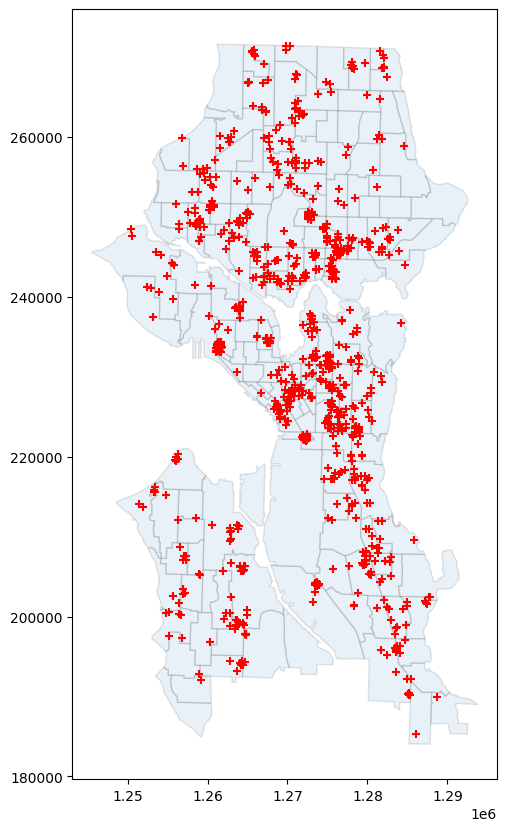

In [ ]:
base=seattle.plot(figsize=(10,10),alpha=0.1,edgecolor='black')
airbnb_source_gdf.plot(ax=base,marker="+",color='red')

### Creación de cuadrícula de destino "grid10"

In [ ]:
import tobler

# this gives a warning, no worries
tobler.util.h3fy(seattle, resolution=10)

/usr/local/lib/python3.12/dist-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


,geometry
hex_id,
8a28d5546ca7fff,"POLYGON ((1254151.789 205868.913, 1253920.932 ..."
8a28d5576ccffff,"POLYGON ((1266537.841 193482.231, 1266768.835 ..."
8a28d5576a17fff,"POLYGON ((1262410.669 193327.187, 1262641.637 ..."
8a28d5576847fff,"POLYGON ((1263417.29 191868.125, 1263365.003 1..."
8a28d557675ffff,"POLYGON ((1265343.715 196639.756, 1265291.423 ..."
...,...
8a28d5550d57fff,"POLYGON ((1265801.388 213949.827, 1265622.772 ..."
8a28d555018ffff,"POLYGON ((1265330.921 215914.564, 1265278.65 2..."
8a28d55546b7fff,"POLYGON ((1266912.335 212055.482, 1266681.427 ..."


In [ ]:
# this gives no warning, but NOT really needed:
seattle_grid10=tobler.util.h3fy(seattle.to_crs(4326), resolution=10).to_crs(seattle.crs)

Este fragmento de código calcula las coordenadas de los puntos centrales (centroides) de cada celda del grid de Seattle. Estos centroides se utilizarán como ubicaciones de referencia o puntos objetivo dentro del área de estudio. Luego, se visualizan las primeras filas para comprobar los resultados.

In [ ]:
seattle_target_locations = seattle_grid10.centroid.get_coordinates()
seattle_target_locations.head()

,x,y
hex_id,,
8a28d5546ca7fff,1.253973e+06,205699.829829
8a28d5576ccffff,1.266717e+06,193651.395736
8a28d5576a17fff,1.262589e+06,193496.343413
8a28d5576847fff,1.263186e+06,191917.470440
8a28d557675ffff,1.265113e+06,196689.081103


Ubiaciones de airbnb:

In [ ]:
airbnb_source_locations = airbnb_source_gdf.get_coordinates()
airbnb_source_locations

,x,y
1,1.273464e+06,204226.481487
6,1.262799e+06,259409.174830
8,1.254164e+06,245164.695174
9,1.273915e+06,204049.952510
22,1.271829e+06,222445.077655
...,...,...
6836,1.250447e+06,248421.829130
6854,1.270919e+06,263484.801575
6859,1.269203e+06,241536.544224
6860,1.268683e+06,241865.151166


Los precios

In [ ]:
airbnb_source_gdf.price

,price
1,88.0
6,72.0
8,70.0
9,91.0
22,128.0
...,...
6836,197.0
6854,111.0
6859,79.0
6860,79.0


target grid

In [ ]:
seattle_target_locations

,x,y
hex_id,,
8a28d5546ca7fff,1.253973e+06,205699.829829
8a28d5576ccffff,1.266717e+06,193651.395736
8a28d5576a17fff,1.262589e+06,193496.343413
8a28d5576847fff,1.263186e+06,191917.470440
8a28d557675ffff,1.265113e+06,196689.081103
...,...,...
8a28d5550d57fff,1.265854e+06,213731.511164
8a28d555018ffff,1.265100e+06,215963.800269
8a28d55546b7fff,1.266734e+06,211886.402040


Objetivo: Cobrar lo mismo que el airbnb más cercano similar.

<Axes: >

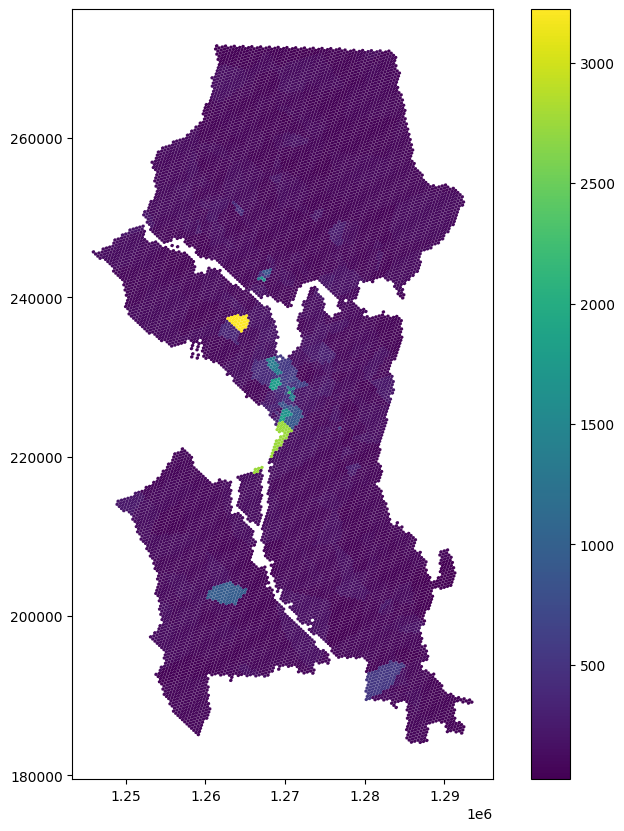

In [ ]:
from scipy.interpolate import griddata

seattle_grid10["nearest"] = griddata(points=airbnb_source_locations,
                                    values=airbnb_source_gdf.price,
                                    xi=seattle_target_locations,
                                    method="nearest")

# here we have:
seattle_grid10.plot('nearest', legend=True,figsize=(10,10))

 Objetivo: Cobrar lo mismo que el promedio de las unidades de alquiler de AirBnb similares más cercanas (las 10 más cernanas).

<Axes: >

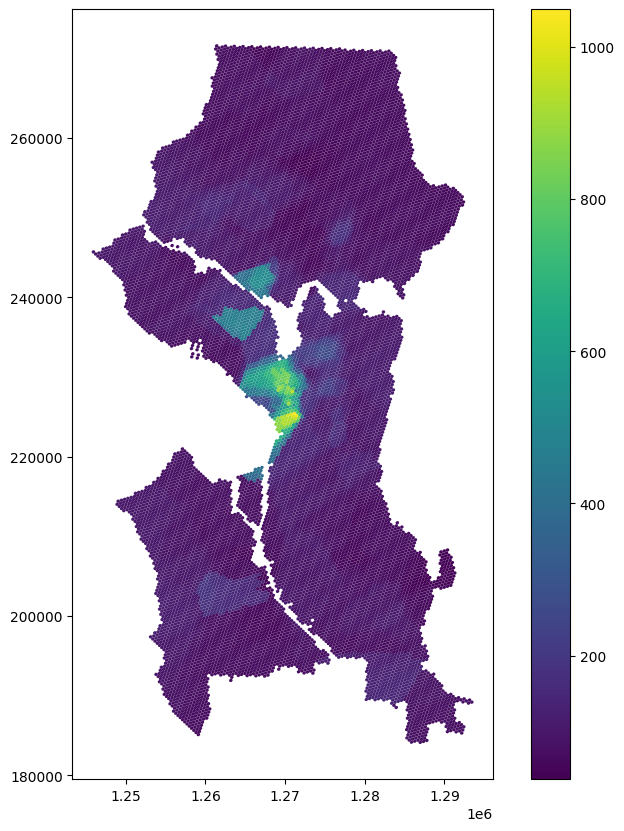

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

interpolation_uniform = KNeighborsRegressor(n_neighbors=10,
                                            weights="uniform").\
                                            fit(airbnb_source_locations,
                                                airbnb_source_gdf.price)

seattle_grid10["knn10_uniform"] = interpolation_uniform.predict(seattle_target_locations)

# here we have
seattle_grid10.plot("knn10_uniform", legend=True,figsize=(10,10))

Objetivo: Cobrar según el promedio ponderado de precios de unidades Airbnb cercanas, dando más peso a las más próximas.

<Axes: >

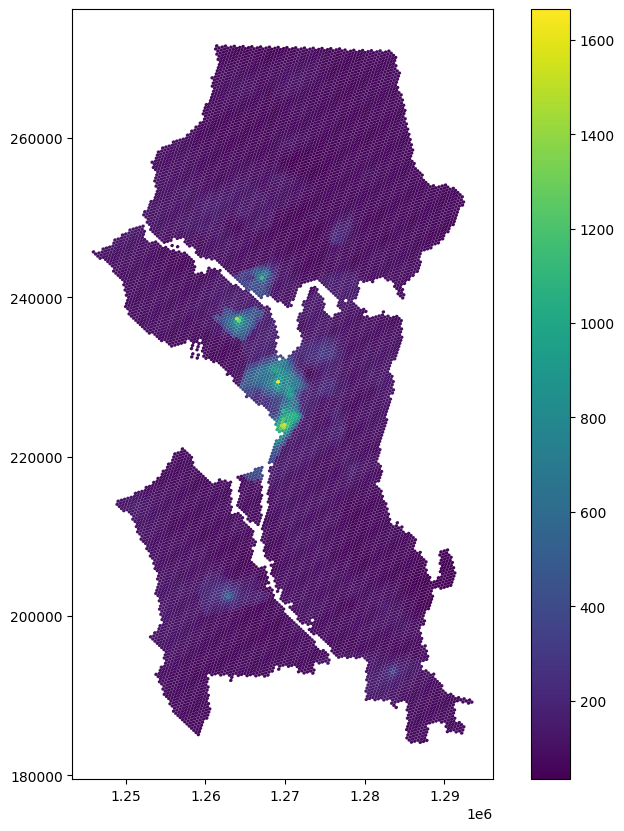

In [ ]:
interpolation_IDW = KNeighborsRegressor(n_neighbors=10,
                                            weights="distance").\
                                            fit(airbnb_source_locations,
                                                airbnb_source_gdf.price)

seattle_grid10["IDW_10"] = interpolation_IDW.predict(seattle_target_locations)

# here we have
seattle_grid10.plot("IDW_10", legend=True,figsize=(10,10))

Objetivo: Cobrar en función de todos los AirBnb situadas en un radio fijo de 500 metros desde la unidad.

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


<Axes: >

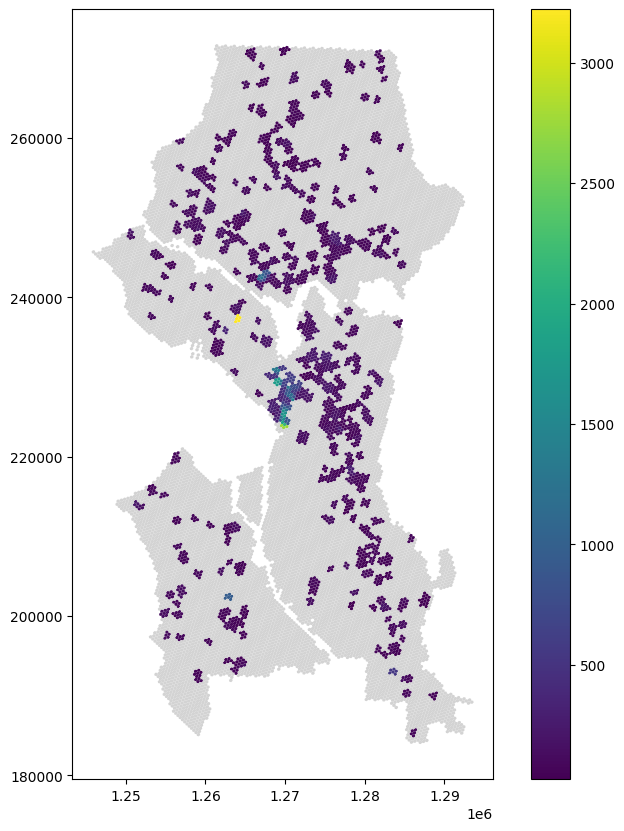

In [ ]:
from sklearn.neighbors import RadiusNeighborsRegressor

interpolation_radius = RadiusNeighborsRegressor(
    radius=500, weights="distance"
)
interpolation_radius.fit(
    airbnb_source_locations, airbnb_source_gdf.price
)

seattle_grid10["radius_500"] = interpolation_radius.predict(seattle_target_locations)

seattle_grid10.plot("radius_500", legend=True, missing_kwds={'color': 'lightgrey'},figsize=(10,10))

Determinación del precio final del Airbnb


In [ ]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point

geolocator = Nominatim(user_agent="theGeocoder")

myEstate_Address = geolocator.geocode(myEstate)

# see
myEstate_Address

Location(1711, East Olive Way, Capitol Hill, Seattle, King County, Washington, 98102, United States of America, (47.6198019, -122.3228567, 0.0))

El geolocator.geocode devolvió una estructura Location. Puede acceder a cada pieza de información desde esta estructura de la siguiente manera:

In [ ]:
myEstate_Address.address, myEstate_Address.longitude,myEstate_Address.latitude

('1711, East Olive Way, Capitol Hill, Seattle, King County, Washington, 98102, United States of America',
 -122.3228567,
 47.6198019)

Creación de GDF

In [ ]:
myEstats_gdf4326 = gpd.GeoDataFrame(
    {'address': [myEstate_Address.address]},
    geometry=[Point(myEstate_Address.longitude, myEstate_Address.latitude)],
    crs="EPSG:4326" # because of lon/lat
)

# reprojecting
myEstats_gdf = myEstats_gdf4326.to_crs(seattle.crs)

# here it is
myEstats_gdf


,address,geometry
0,"1711, East Olive Way, Capitol Hill, Seattle, K...",POINT (1273094.225 229637.651)


Se busca en qué hexágono se encuentra mi unidad y trae esos precios de alrededor

In [ ]:
myEstats_gdf.sjoin(
    seattle_grid10,
    how="left",
    predicate="within"
)

,address,geometry,hex_id,nearest,knn10_uniform,IDW_10,radius_500
0,"1711, East Olive Way, Capitol Hill, Seattle, K...",POINT (1273094.225 229637.651),8a28d542c4effff,52.0,156.0,133.316221,NaN


Con esto, toma la mejor desición:

| Price Interpolation Method | Price Recommendation | Rationale |
|---------------------------|----------------------|-----------|
| **nearest** | The most conservative starting price. | It's based only on the price of the single closest competitor. |
| **knn10_uniform** | A balanced average price. | It smooths out the highest/lowest outliers by averaging the prices of the k nearest neighbors equally. |
| **IDW_10** | The most data-driven price (Recommended). | This is your Inverse Distance Weighting (IDW) result. It's the most robust prediction as it gives greater influence to very nearby, similar properties. |
| **radius_500** | A highly localized price (Use with caution). | Only reflects the market of properties within a short, fixed distance. If you have a NaN here, it suggests your property is too remote for a localized comparison. |



______

[BACK TO MAIN MENU](https://cienciadedatosespacial.github.io/GDF_OPS_applications/)